# Heart Attack Analysis and Prediction 


## Initial library imports

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd 
import sys
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import math
import datetime as dt

Statistic functions and models

In [3]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Sklearn

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

Clustering (Unsupervised Learning) - modules

In [5]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

Cross Validation Score

In [6]:
from sklearn.model_selection import cross_val_score

## Initial Data Examination 

In [7]:
heart = pd.read_csv("heart.csv")
o2 = pd.read_csv("o2Saturation.csv")

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [98]:
X = heart.copy()
y = X.pop("output")

# Scaling the dataset
scaler = StandardScaler()
X[list(X.columns)]= scaler.fit_transform(X[list(X.columns)])

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

##  logistic regression model

In [99]:
lr = LogisticRegression().fit(X_train, y_train)

lr.score(X_test, y_test)

0.83

## svm - rbf kernel

In [100]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)

svm.score(X_test, y_test)

0.82

## KNN Classifier

In [117]:
knn = KNeighborsClassifier(n_neighbors = 18).fit(X_train, y_train)
knn.score(X_test, y_test)

0.87

## Decision Tree model

In [101]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.tree import DecisionTreeClassifier

In [102]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Less chance', "More chance"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

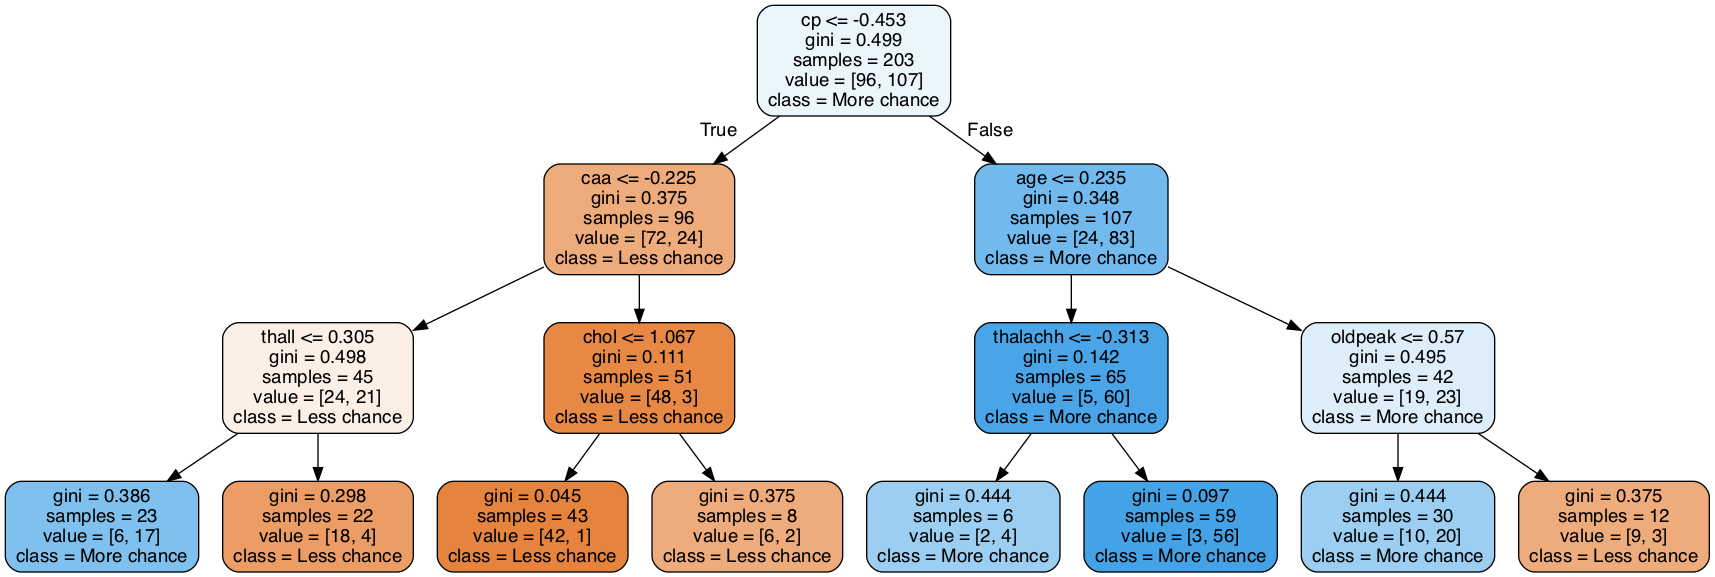

In [103]:
dt = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

graph = get_dt_graph(dt)
Image(graph.create_png())

In [104]:
evaluate_model(dt)

Train Accuracy : 0.8472906403940886
Train Confusion Matrix:
[[75 21]
 [10 97]]
--------------------------------------------------
Test Accuracy : 0.81
Test Confusion Matrix:
[[29 13]
 [ 6 52]]


## Decision Tree - Grid Search

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [107]:
dt_grid = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt_grid, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [108]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [109]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002065,0.000137,0.001355,0.000046,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.588235,0.725490,0.627451,0.76,0.675294,0.069934,32
1,0.002493,0.000129,0.001941,0.000389,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.647059,0.725490,0.627451,0.76,0.690000,0.054580,28
2,0.002949,0.000423,0.002187,0.000208,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.588235,0.745098,0.647059,0.76,0.685098,0.070781,29
3,0.002931,0.000468,0.002047,0.000420,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.568627,0.745098,0.764706,0.76,0.709608,0.081716,20
4,0.003632,0.000520,0.002805,0.000702,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.529412,0.529412,0.529412,0.52,0.527059,0.004075,41


In [110]:
dt_best = grid_search.best_estimator_

dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [111]:
evaluate_model(dt_best)

Train Accuracy : 0.9211822660098522
Train Confusion Matrix:
[[ 87   9]
 [  7 100]]
--------------------------------------------------
Test Accuracy : 0.78
Test Confusion Matrix:
[[32 10]
 [12 46]]


## Random Forest - Grid Search

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [114]:
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [115]:
grid_search.fit(X,y)

# best estimator
rf_best = grid_search.best_estimator_

rf_best

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


RandomForestClassifier(max_depth=20, max_features=3, min_samples_leaf=5,
                       n_estimators=30)

In [116]:
evaluate_model(rf_best)

Train Accuracy : 0.9113300492610837
Train Confusion Matrix:
[[ 84  12]
 [  6 101]]
--------------------------------------------------
Test Accuracy : 0.92
Test Confusion Matrix:
[[36  6]
 [ 2 56]]
